## K-Means Image compression from scratch practice tensorflow

In [15]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
def load_data():
    data = np.load('../datasets/kmeans_image_compression.npy')
    return data

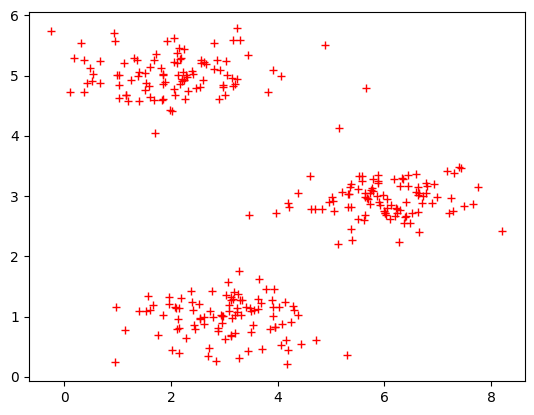

In [17]:
graph_data = load_data()
plt.plot(graph_data[:, 0], graph_data[:, 1], 'r+')
plt.show()

In [18]:
# Function to initialize centroids randomly
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), size=k, replace=False)
    return X[indices]

# Function to assign each data point to the nearest centroid
def calculate_centroids(X, centroids):
    distances = np.linalg.norm(X[:, None] - centroids, axis=2)
    return np.argmin(distances, axis=1)

### Implementing Kmeans

In [19]:
'''
Initialize K (number of clusters)
cost_array = []
Iterate through K:
    lowest cost = 10000
    Initialize that number of centroids N times:
        while (centroid is moving):
            Calculate the loss function
            Group the data to the centroid they are closest to
            take mean in every group
            if (centroids === means):
                break
            centroids = means
        calculate cost
        if (cur_cost < lowest_cost):
            cur_cost = lowest_cost
    cost_array.push(lowest_cost)

Plot the elbow graph and select the value of K and its cost
'''
def k_means():
    K = 5
    X = load_data()
    iterations = 100
    for k in range(2, K + 1):
        lowest_cost = float('inf')
        for iteration in range(iterations):
            cost = 0
            centroids = initialize_centroids(X, k)
            old_centroids = None
            while not np.array_equal(centroids, old_centroids):
                old_centroids = centroids.copy()
                X_centroids = calculate_centroids(X, centroids)

                # Update centroids to be the mean of points in each cluster
                for i in range(k):
                    centroids[i] = np.mean(X[X_centroids == i], axis=0)

            X_centroids = calculate_centroids(X, centroids)
            cost = 0
            for i in range(len(X)):
                cost += np.linalg.norm(X[i] - centroids[X_centroids[i]])

            if lowest_cost > cost:
                lowest_cost = cost
        print(f"Lowest cost for K = {k}: {lowest_cost}")

### Image compression

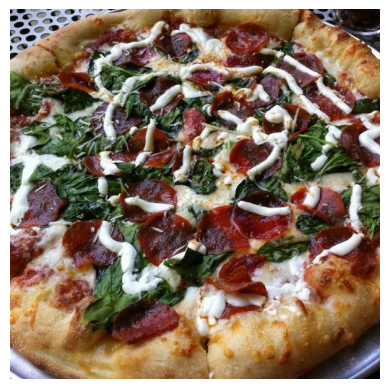

In [20]:
original_image = plt.imread('../datasets/pizza.jpg')
plt.axis('off')
plt.imshow(original_image)

In [21]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for k in range(K):
            norm_ik = np.linalg.norm(X[i] - centroids[k])
            distance.append(norm_ik)
        idx[i] = np.argmin(distance)
    return idx

In [22]:
def run_kmeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zero(m)

    for i in range(max_iters):
        print(f"K Means iteration {i} | {max_iters-1}")
        idx = find_closest_centroids(X, centroids)

        if plot_progress:
            plot_progress(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        centroids = calculate_centroids(X, idx, K)